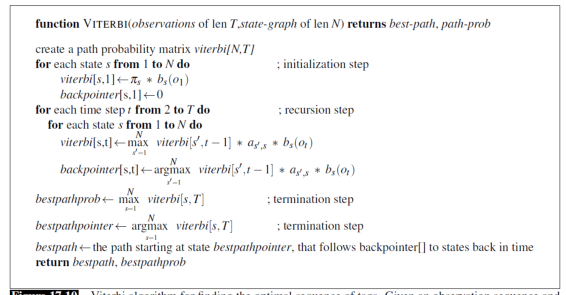

In [23]:
states = ['NNP', 'MD', 'VB', 'JJ', 'NN', 'RB', 'DT']
observations = ['Janet', 'will', 'back', 'the', 'bill']

# Transition probability matrix A
# States: NNP, MD, VB, JJ, NN, RB, DT
A = [
    [0.2767, 0.0006, 0.0031, 0.0453, 0.0449, 0.0510, 0.2026],  # <s>
    [0.3777, 0.0110, 0.0009, 0.0084, 0.0584, 0.0090, 0.0025],  # NNP
    [0.0008, 0.0002, 0.7968, 0.0005, 0.0008, 0.1698, 0.0041],  # MD
    [0.0322, 0.0005, 0.0050, 0.0837, 0.0615, 0.0514, 0.2231],  # VB
    [0.0366, 0.0004, 0.0001, 0.0733, 0.4509, 0.0036, 0.0036],  # JJ
    [0.0096, 0.0176, 0.0014, 0.0086, 0.1216, 0.0177, 0.0068],  # NN
    [0.0068, 0.0102, 0.1011, 0.1012, 0.0120, 0.0728, 0.0479],  # RB
    [0.1147, 0.0021, 0.0002, 0.2157, 0.4744, 0.0102, 0.0017]   # DT
]

# Observation likelihood matrix B
# Observations: Janet, will, back, the, bill
B = [
    [0.000032, 0       , 0       , 0.000048, 0       ], # NNP
    [0       , 0.308431, 0       , 0       , 0       ], # MD
    [0       , 0.000028, 0.000672, 0       , 0.000028], # VB
    [0       , 0       , 0.00034 , 0       , 0       ], # JJ
    [0       , 0.0002  , 0.000223, 0       , 0.002337], # NN
    [0       , 0       , 0.010446, 0       , 0       ], # RB
    [0       , 0       , 0       , 0.506099, 0       ]  # DT
]

print("size of A:", len(A), "x", len(A[0]))
print("size of B:", len(B), "x", len(B[0]))

size of A: 8 x 7
size of B: 7 x 5


In [2]:
n = len(B)  # Number of states
T = len(B[0])  # Number of observations
viterbi = [[0] * T for _ in range(n)]
backpointer = [[0] * T for _ in range(n)]

print("n = ", n)
print("t = ", T)
print("viterbi = ", viterbi)   
print("viterbi size = ", len(viterbi), "x", len(viterbi[0]))

n =  7
t =  5
viterbi =  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
viterbi size =  7 x 5


In [3]:
# Initialize first column
for state in range(n):
    viterbi[state][0] = A[0][state] * B[state][0]
    backpointer[state][0] = -1  # No previous state for first column
    
print("viterbi after initialization:", viterbi)
print("backpointer after initialization:", backpointer)

viterbi after initialization: [[8.8544e-06, 0, 0, 0, 0], [0.0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0]]
backpointer after initialization: [[-1, 0, 0, 0, 0], [-1, 0, 0, 0, 0], [-1, 0, 0, 0, 0], [-1, 0, 0, 0, 0], [-1, 0, 0, 0, 0], [-1, 0, 0, 0, 0], [-1, 0, 0, 0, 0]]


In [4]:
for t in range(1, T):  # for each time step (starting from 1)
    for state in range(n):  # for each current state
        max_prob = 0
        best_prev_state = 0
        
        for prev_state in range(n):  # for each previous state
            # Calculate probability of reaching `state` from `prev_state`
            prob = viterbi[prev_state][t-1] * A[prev_state+1][state] * B[state][t]
            
            if prob > max_prob:
                max_prob = prob
                best_prev_state = prev_state  # 👈 remember who gave the best path
        
        # Save the best probability and where it came from
        viterbi[state][t] = max_prob
        backpointer[state][t] = best_prev_state  # 👈 store the winning prev_state


In [18]:
# Visualize the Viterbi matrix
print("Viterbi matrix:", end='\n\n')
for i in range(n):
    for j in range(T):
        print(f"{viterbi[i][j]: < 30}", end=' ')
    print()

Viterbi matrix:

 8.8544e-06                     0                              0                              2.486139834207686e-17          0                             
 0.0                            3.00406859104e-08              0                              0                              0                             
 0.0                            2.2313087999999997e-13         1.6085273254449314e-11         0                              1.0170715811950793e-20        
 0.0                            0                              5.106916604768e-15             0                              0                             
 0.0                            1.03419392e-10                 5.35925836641536e-15           0                              2.013570710221386e-15         
 0.0                            0                              5.3284089852402517e-11         0                              0                             
 0.0                            0              

In [20]:
# Visualize the backpointer matrix

print("Backpointer matrix:", end='\n\n')

for i in range(n):
    for j in range(T):
        print(f"{backpointer[i][j]: < 30}", end=' ')
    print()

Backpointer matrix:

-1                              0                              0                              2                              0                             
-1                              0                              0                              0                              0                             
-1                              0                              1                              0                              6                             
-1                              0                              1                              0                              0                             
-1                              0                              1                              0                              6                             
-1                              0                              1                              0                              0                             
-1                              0          

In [21]:
# Find the best final state (MAX over last column)

max_prob = 0
best_final_state = 0
for state in range(n):
    if viterbi[state][T-1] > max_prob:
        max_prob = viterbi[state][T-1]
        best_final_state = state
        
print("max_prob:", max_prob)
print("best_final_state:", best_final_state)

max_prob: 2.013570710221386e-15
best_final_state: 4


In [22]:
# Find the best path

# Backtracking
path = [0] * T
path[T-1] = best_final_state

for t in range(T-2, -1, -1):
    path[t] = backpointer[path[t+1]][t+1]
    
print("Best path:", path)

Best path: [0, 1, 2, 6, 4]


In [34]:
# Print the results
print("\nOptimal POS tag sequence:")
print("Word\t\tPOS Tag")
print("-" * 25)
for i in range(T):
    print(f"{observations[i]:<10}\t{states[path[i]]}")

print(f"\nTotal probability: {max_prob:.2e}")


Optimal POS tag sequence:
Word		POS Tag
-------------------------
Janet     	NNP
will      	MD
back      	VB
the       	DT
bill      	NN

Total probability: 2.01e-15
